# Project Description (Rainfall Weather Forecasting)

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things


# Problem Statement

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

The dataset contains 8425 rows and 23 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We have combination of both Object and float type data

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


# Checking Null values

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

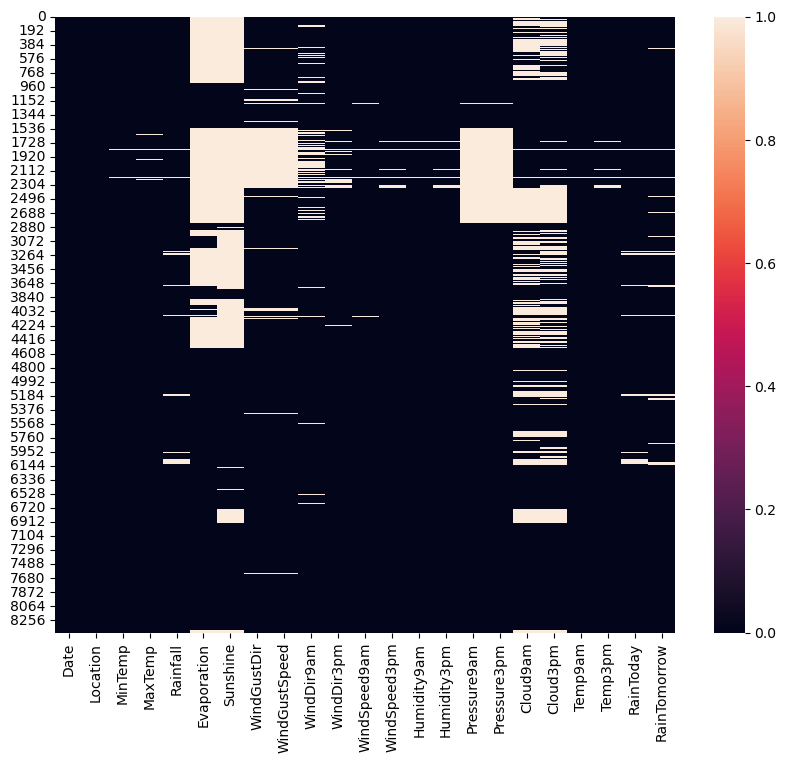

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

Every feature is having Null values except date,location

In [9]:
# Getting all object type unique values

features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
--------------------------------------
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------------------
WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
--------------------------------------
WindDir9am
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380

In [11]:
num_features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='float64':
        num_features_list.append(feature_type)
num_features_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [12]:
for feature in num_features_list:
    print(feature)
    print(df[feature].value_counts())
    print(f'The length of {feature} is {len(df[feature].value_counts())}')
    print('--------------------------------------')

MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
The length of MinTemp is 285
--------------------------------------
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
The length of MaxTemp is 331
--------------------------------------
Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
The length of Rainfall is 250
--------------------------------------
Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64
The length of Evaporation is 116
-----------------

# Handling NAN Values

# For float type

In [13]:
for i in df.columns:
    if df[i].dtypes == "float64":
        fet_mean = np.mean(df[i])
        df[i] = df[i].fillna(fet_mean)

# For object type

In [14]:
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
for i in features_list:
    df[i] = df[i].fillna(df[i].mode()[0])

<AxesSubplot:>

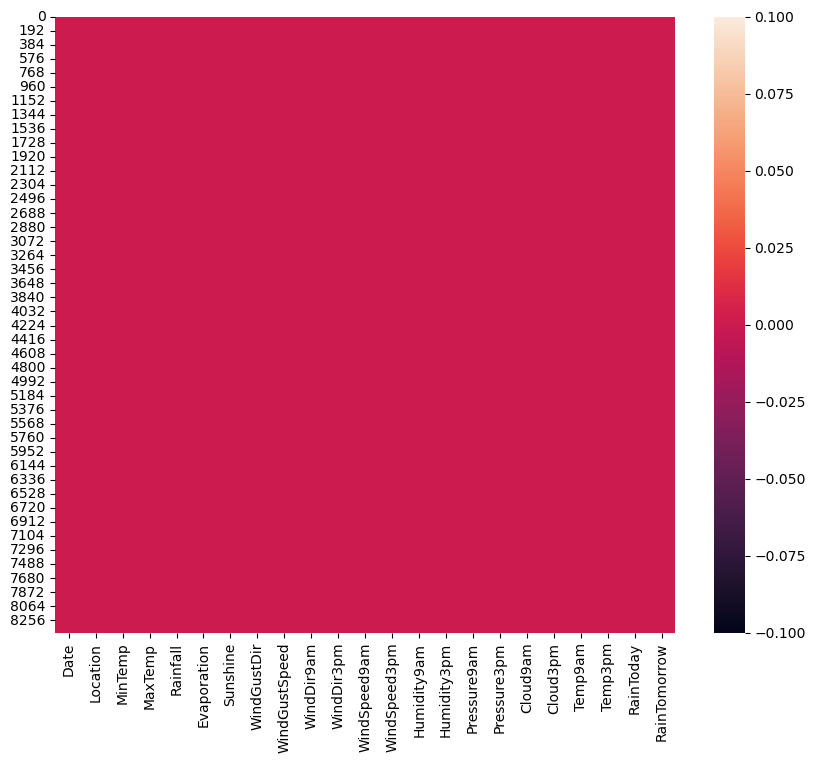

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


# EDA

# Univariate Analaysis for categeorical columns

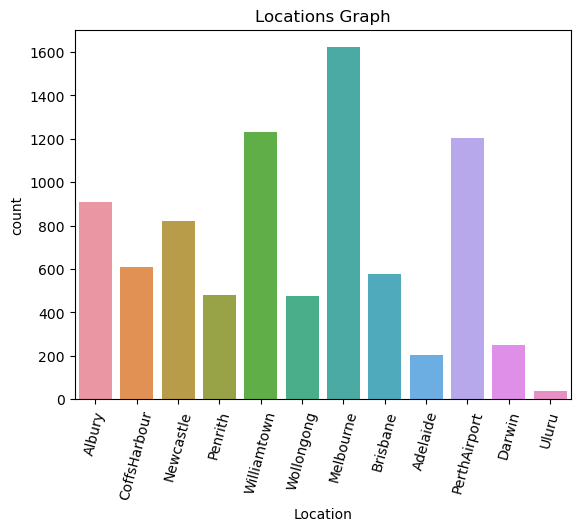

In [18]:
# Location feature
sns.countplot(df['Location'])
plt.title('Locations Graph')
plt.xticks(rotation=75)
plt.show()

We have highest rainfall data from Melbourne and least rainfall from Uluru

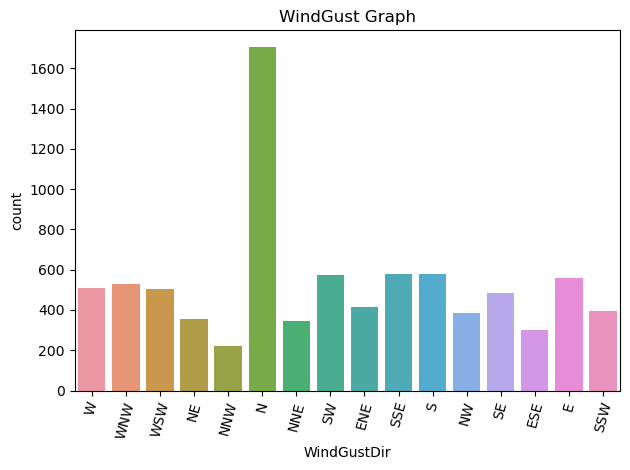

In [19]:
# WindGustDir feature
sns.countplot(df['WindGustDir'])
plt.title('WindGust Graph')
plt.xticks(rotation=75)
plt.tight_layout()

wind gust was very high in the north region.
Very low in NNW

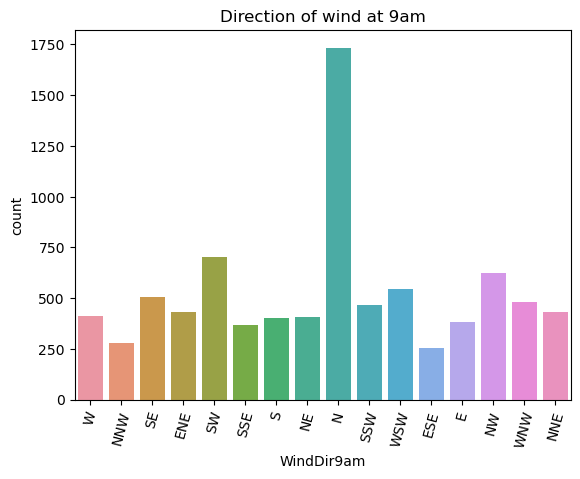

In [21]:
# WindDir9am feature
sns.countplot(df['WindDir9am'])
plt.title('Direction of wind at 9am')
plt.xticks(rotation=75)
plt.show()

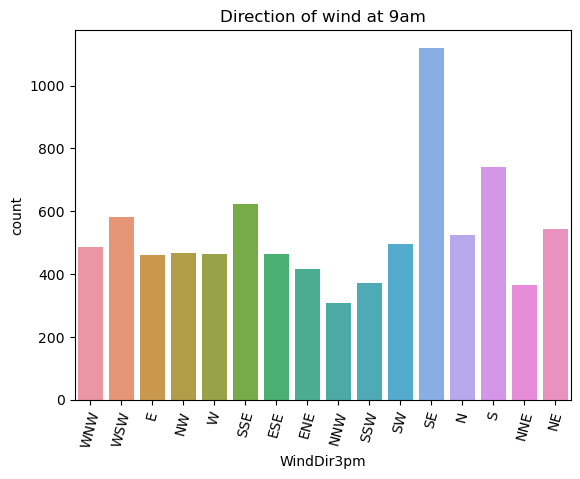

In [22]:
# WindDir3pm feature
sns.countplot(df['WindDir3pm'])
plt.title('Direction of wind at 9am')
plt.xticks(rotation=75)
plt.show()

In the above above 2 plots we can see that wind direction fo rboth 9 am and 3 pm is towards North.

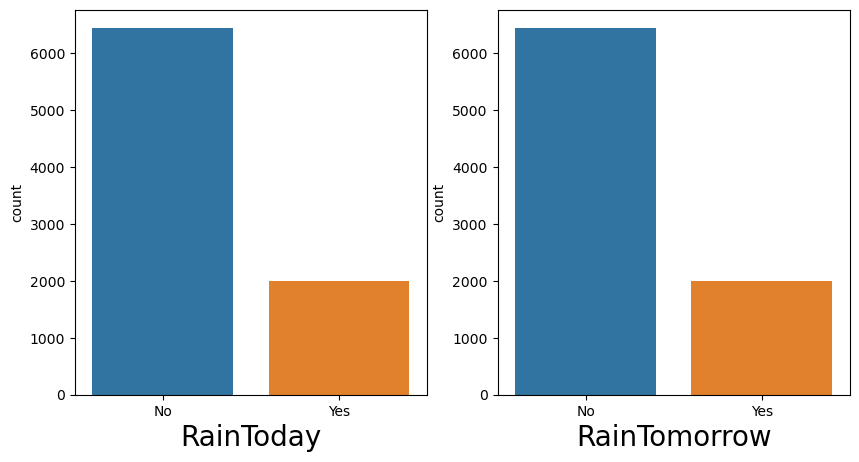

In [24]:
# RainToday, RainTomorrow Features
plt.figure(figsize=(10,5),facecolor='white')
cat_ftrs = ['RainToday','RainTomorrow']
pltnum=1
for feature in cat_ftrs:
    plt.subplot(1,2,pltnum)
    sns.countplot(df[feature])
    plt.xlabel(feature,fontsize=20)
    pltnum+=1
plt.show()

# Visualization of the distribution of the Numerical features

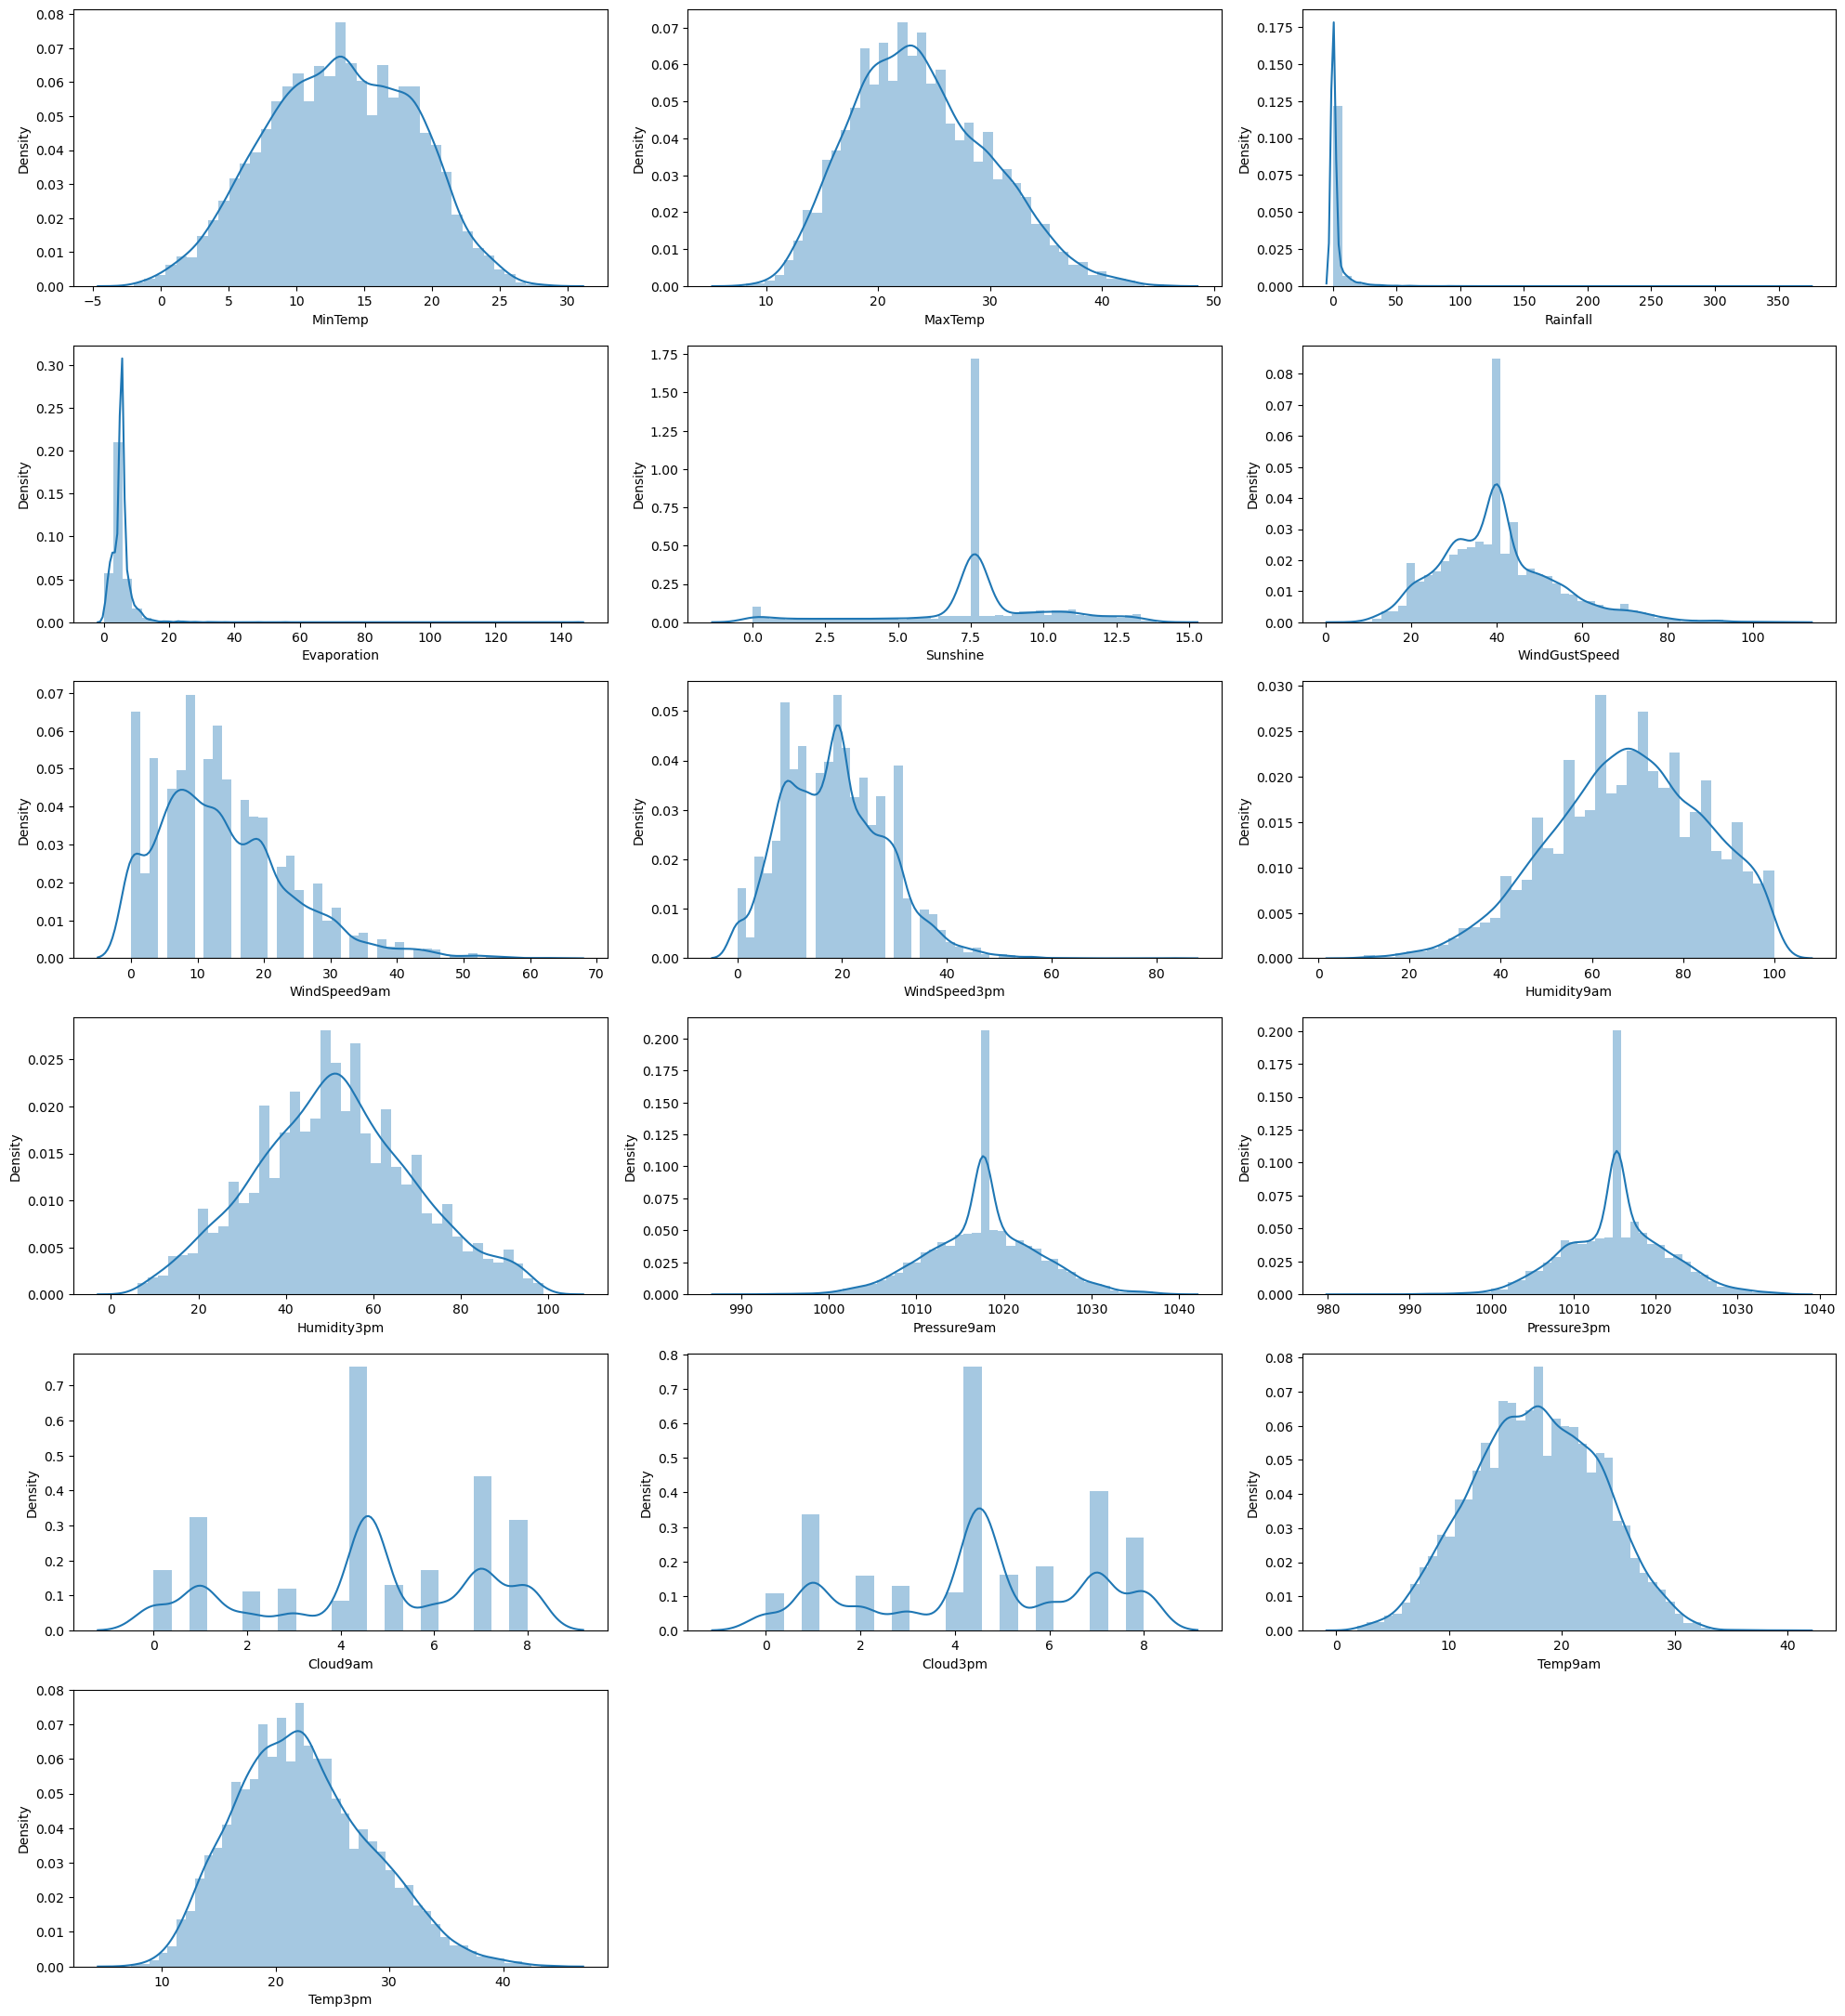

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for ftrs in num_features_list:
    if plotnum<=20:
        ax = plt.subplot(7,3,plotnum)
        sns.distplot(df[ftrs])
        plt.xlabel(ftrs,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnum+=1
plt.tight_layout()

# Bivariate Analysis

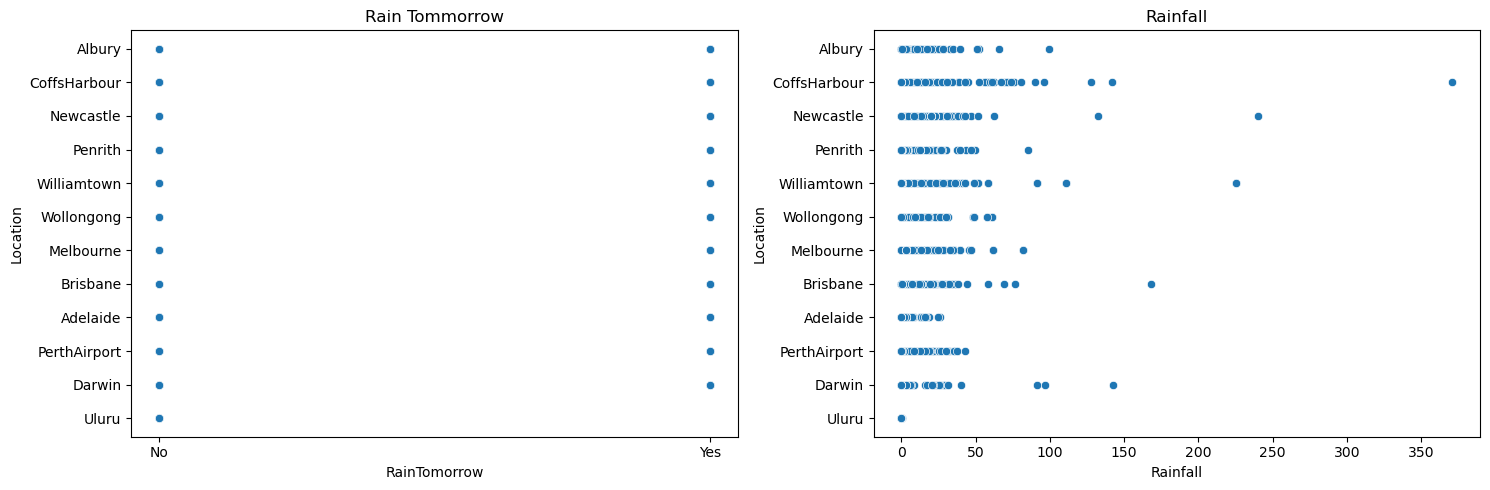

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Rain Tommorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.tight_layout()

We can see that Location doesnot have any major impact.

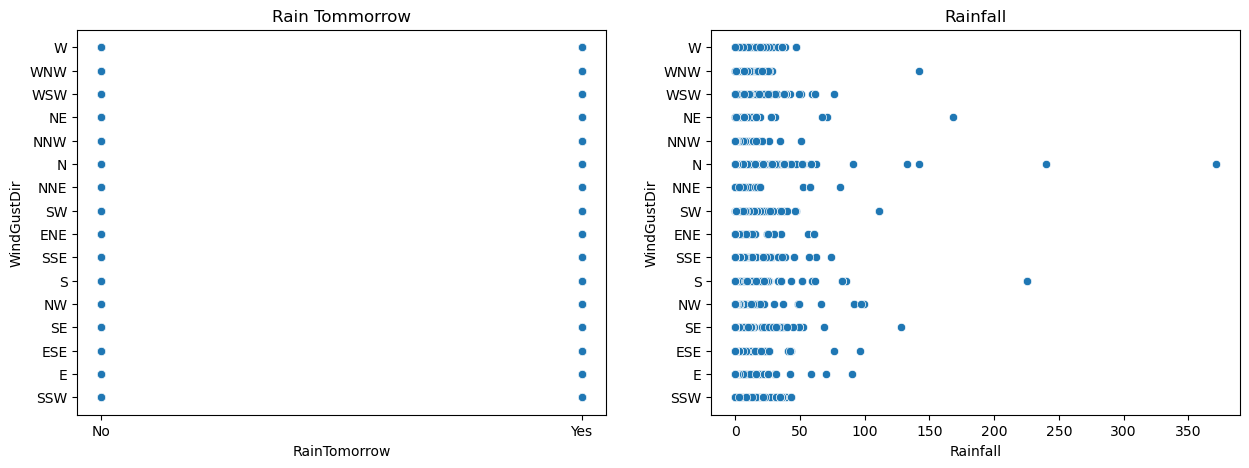

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Rain Tommorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

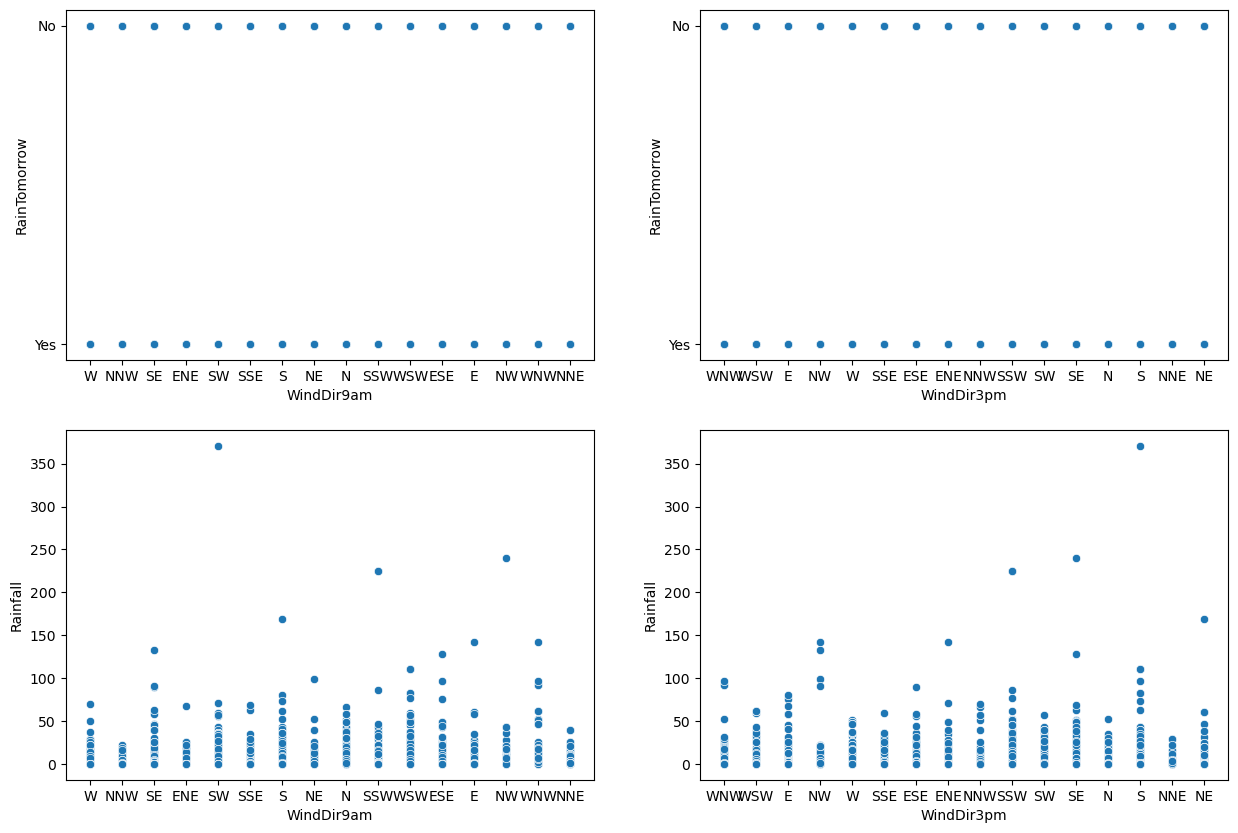

In [28]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm', y='Rainfall',ax = axes[1,1], data=df)

No linear relationship with target

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

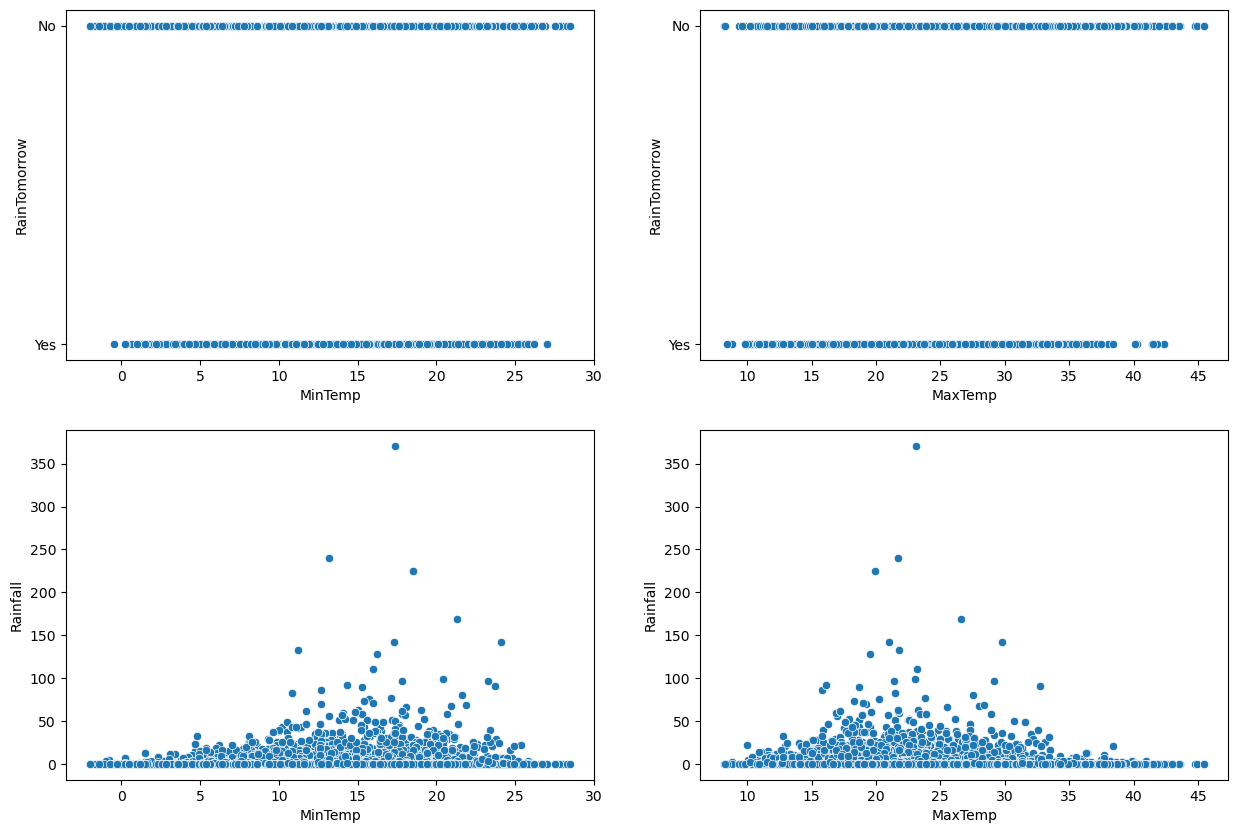

In [29]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w MinTemp and RainTomorrow
sns.scatterplot(x='MinTemp', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w MaxTemp and RainTomorrow
sns.scatterplot(x='MaxTemp', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w MinTemp and Rainfall
sns.scatterplot(x='MinTemp', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w MaxTemp and Rainfall
sns.scatterplot(x='MaxTemp', y='Rainfall',ax = axes[1,1], data=df)

No linear relationship with target.

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

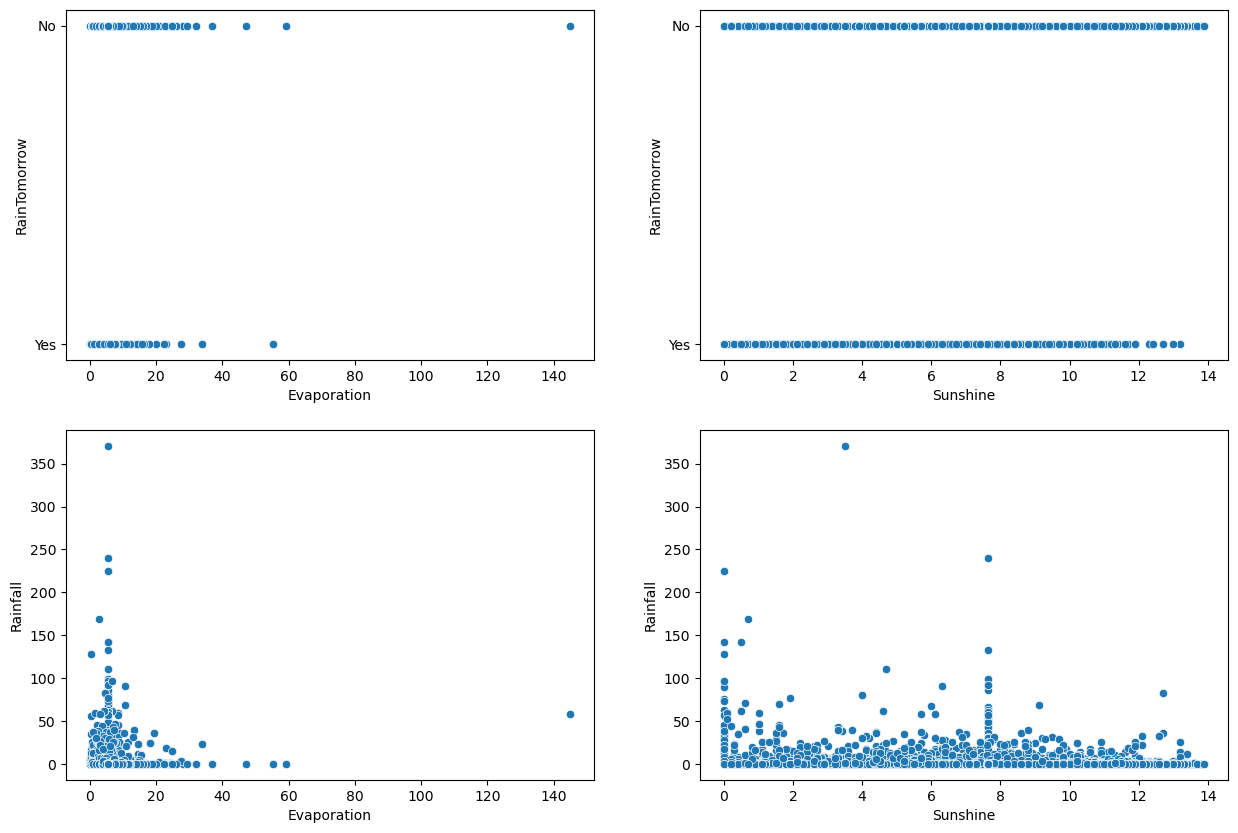

In [30]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w Evaporation and RainTomorrow
sns.scatterplot(x='Evaporation', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w Sunshine and RainTomorrow
sns.scatterplot(x='Sunshine', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w Evaporation and Rainfall
sns.scatterplot(x='Evaporation', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w Sunshine and Rainfall
sns.scatterplot(x='Sunshine', y='Rainfall',ax = axes[1,1], data=df)

There is relationship present between. the feature and target.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

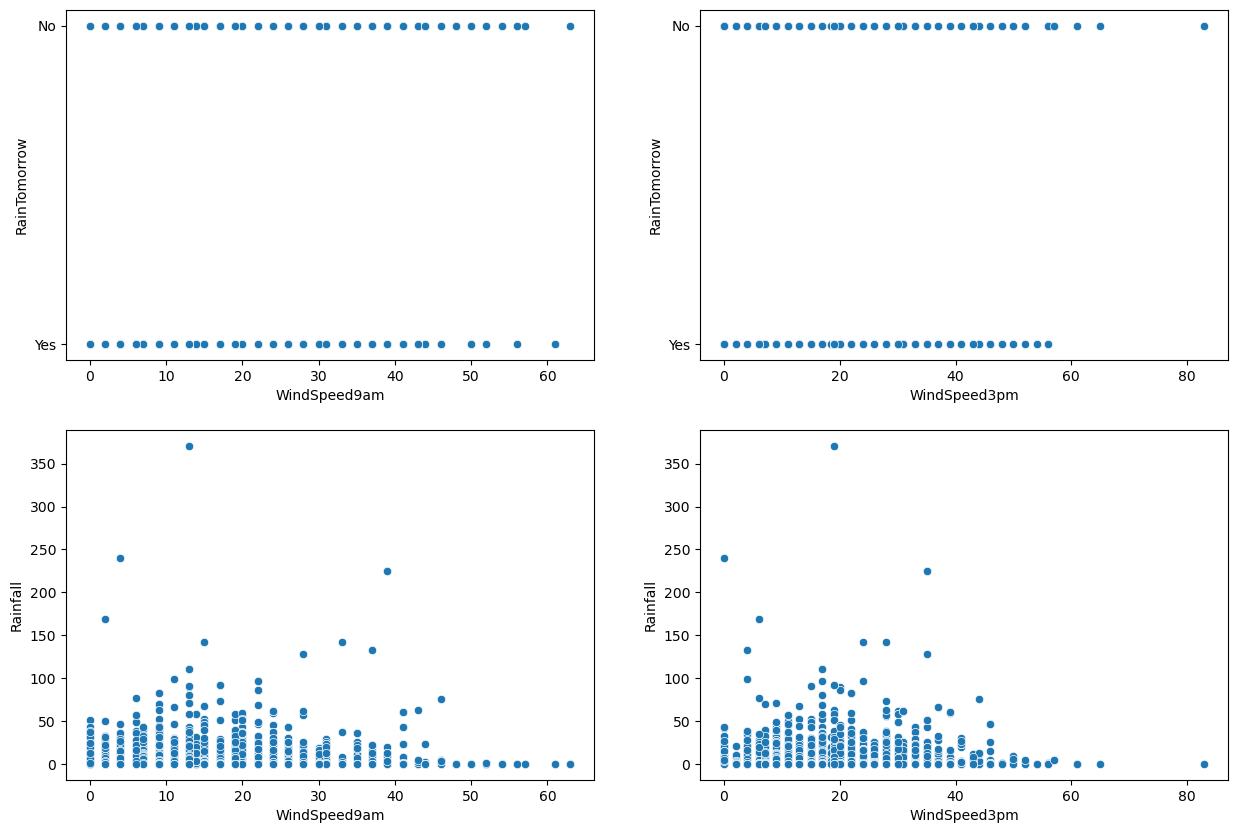

In [31]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w WindSpeed9am and RainTomorrow
sns.scatterplot(x='WindSpeed9am', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w WindSpeed3pm and RainTomorrow
sns.scatterplot(x='WindSpeed3pm', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w WindSpeed9am and Rainfall
sns.scatterplot(x='WindSpeed9am', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w WindSpeed3pm and Rainfall
sns.scatterplot(x='WindSpeed3pm', y='Rainfall',ax = axes[1,1], data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

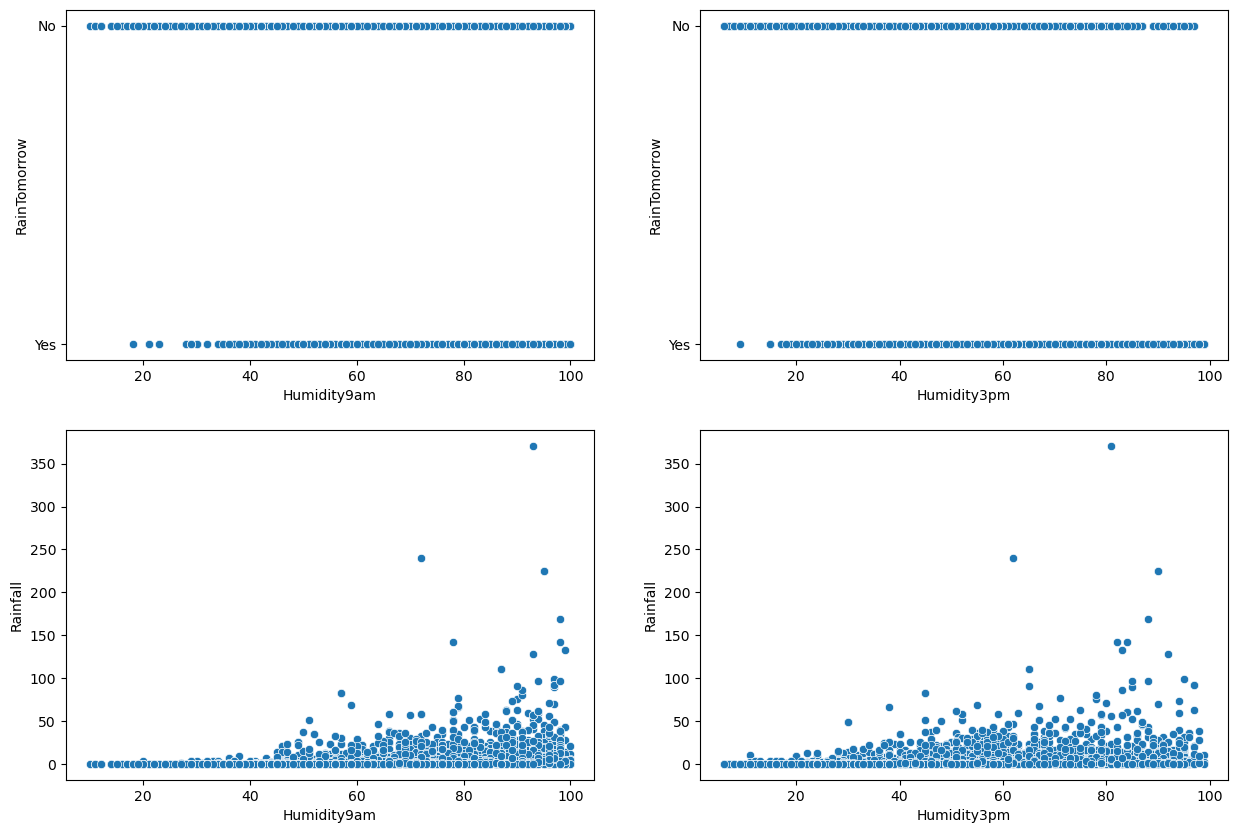

In [32]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w Humidity9am and RainTomorrow
sns.scatterplot(x='Humidity9am', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w Humidity3pm and RainTomorrow
sns.scatterplot(x='Humidity3pm', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w Humidity9am and Rainfall
sns.scatterplot(x='Humidity9am', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w Humidity3pm and Rainfall
sns.scatterplot(x='Humidity3pm', y='Rainfall',ax = axes[1,1], data=df)

There is inverse relation in humidity and RainTomorrow. Whereas, a positive relationship between humidity and rainfall can be observed.

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

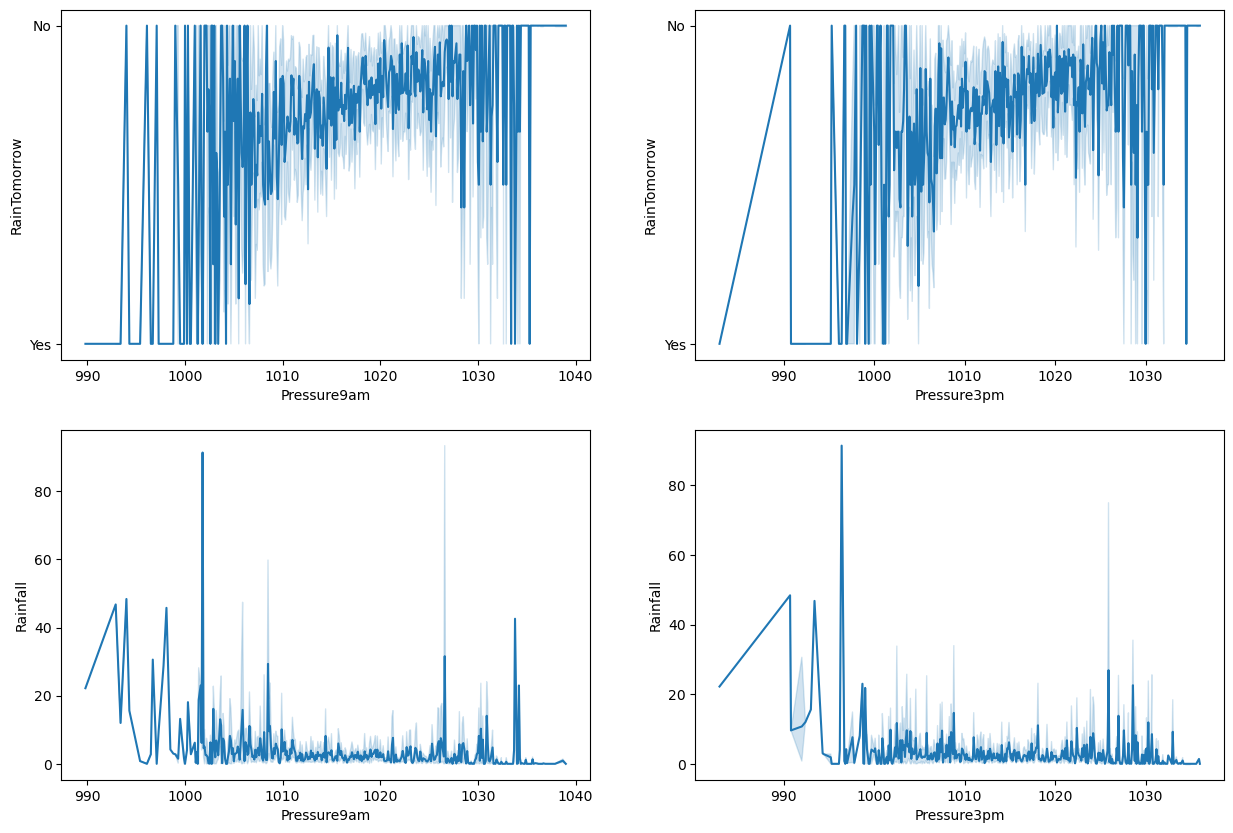

In [33]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w Pressure9am and Rainfall
sns.lineplot(x='Pressure9am', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm', y='Rainfall',ax = axes[1,1], data=df)

No Linear relationship

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

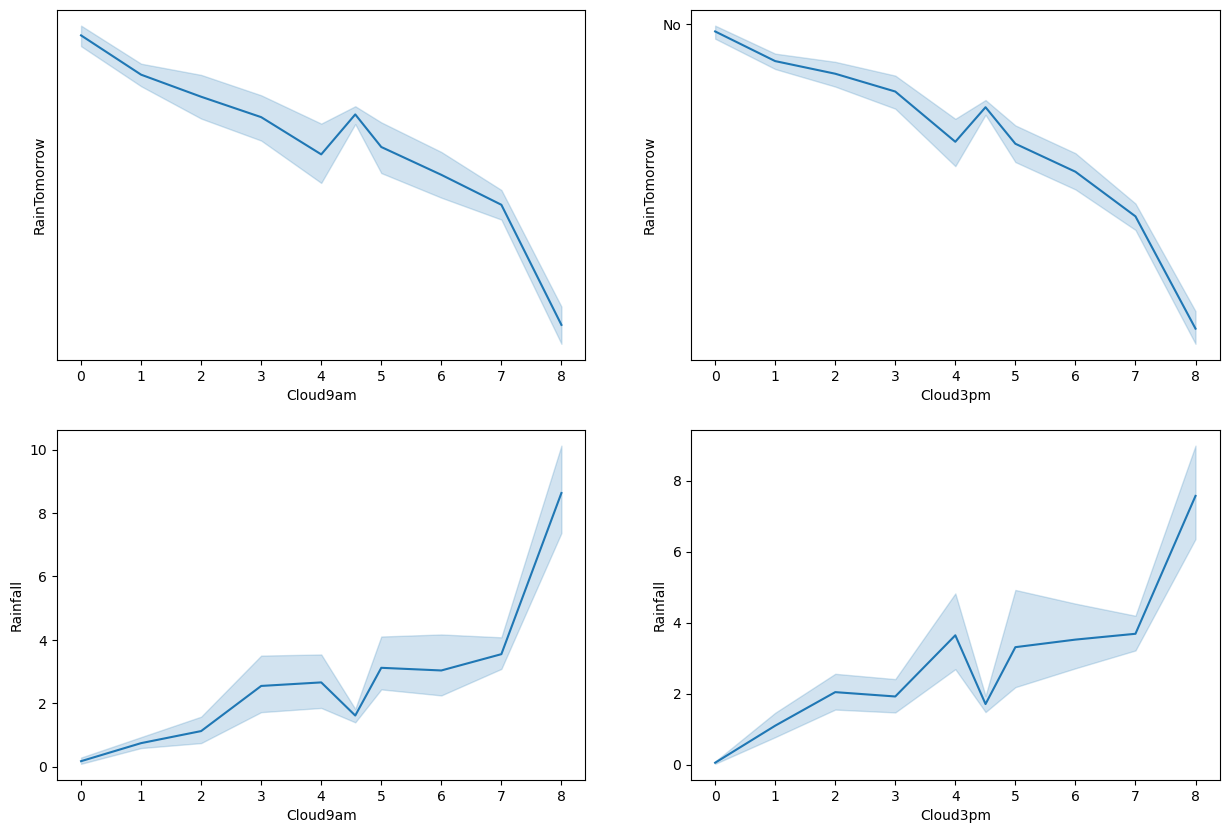

In [34]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
#Checking the relation b/w Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am', y='RainTomorrow',ax = axes[0,0], data=df)
#Checking the relation b/w Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm', y='RainTomorrow',ax = axes[0,1], data=df)
#Checking the relation b/w Cloud9am and Rainfall
sns.lineplot(x='Cloud9am', y='Rainfall',ax = axes[1,0], data=df)
#Checking the relation b/w Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm', y='Rainfall',ax = axes[1,1], data=df)

# Outlier Detection

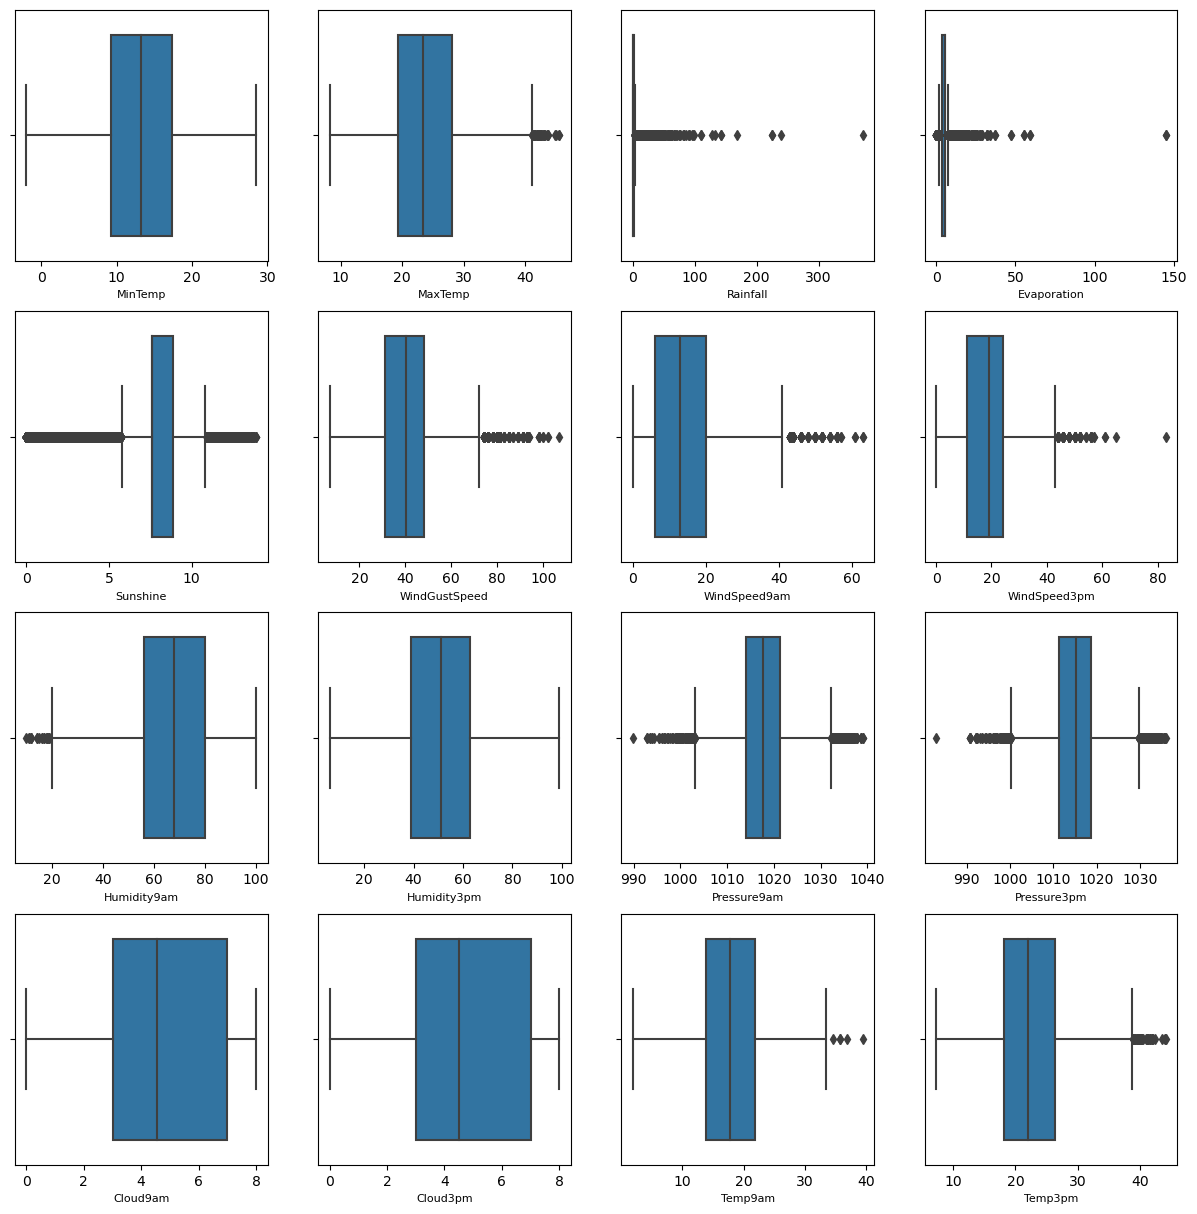

In [35]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for col in num_features_list:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=8)
    plotnum+=1
plt.show()

we have outliers in:
MaxTemp,
Rainfall,
Evaporation,
Sunshine,
WindGustSpeed,
WindSpeed9am,
WindSpeed3pm,
Humidity9am,
Pressure9am,
Pressure3pm,
Temp3pm.

# Removal of outliers

In [36]:
# Applying z-score method
df_2 = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Pressure3pm']]
from scipy.stats import zscore
zscore_abs = np.abs(zscore(df_2))
#THreshold is taken as +3/-3
zdf = df_2[(zscore_abs < 3).all(axis=1)]

In [37]:
zdf.shape

(7997, 11)

In [38]:
df.shape

(8425, 23)

In [39]:
print('The data loss after using z-score method is ',(8425-7997)/8425 * 100)

The data loss after using z-score method is  5.080118694362018


In [40]:
# Using IQR method
# Creating a function to remove outlier
"""Takes the dataframe and removed the outliers and will return back"""
outlier_index = np.array([])
for column in df_2:
    q1 = df_2[column].quantile(0.25)
    q3 = df_2[column].quantile(0.75)
    IQR = q3-q1
    col = df_2[column]
    indx = col[(col > q3+1.5*IQR) | (col < q1-1.5*IQR)].index
    outlier_index = np.append(outlier_index,indx)
outlier_index

array([  44.,   59.,   60., ..., 8422., 8423., 8424.])

In [41]:
df_2 = df_2.drop(outlier_index)
df_2.shape

(0, 11)

# Going ahead with zscore method

In [42]:
dropindx = df.index.difference(zdf.index)
df.drop(dropindx,inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


# Checking for skewness

In [43]:
df.skew()

MinTemp         -0.083031
MaxTemp          0.331087
Rainfall         3.490984
Evaporation      0.854300
Sunshine        -0.723885
WindGustSpeed    0.507909
WindSpeed9am     0.711266
WindSpeed3pm     0.301919
Humidity9am     -0.230824
Humidity3pm      0.119488
Pressure9am      0.019072
Pressure3pm      0.042339
Cloud9am        -0.357078
Cloud3pm        -0.266472
Temp9am         -0.030603
Temp3pm          0.353778
dtype: float64

We have skewness in Sunshine,rainfall,Evaporation,Windspeed9am,Windgustspeed

# Using Log Transformation to remove skewness

In [44]:
df['Sunshine'] = np.log1p(df['Sunshine'])
df['Rainfall'] = np.log1p(df['Rainfall'])
df['Evaporation'] = np.log1p(df['Evaporation'])
df['WindSpeed9am'] = np.log1p(df['WindSpeed9am'])
df['WindGustSpeed'] = np.log1p(df['WindGustSpeed'])

In [45]:
df.skew()

MinTemp         -0.083031
MaxTemp          0.331087
Rainfall         1.664396
Evaporation     -0.989790
Sunshine        -2.462072
WindGustSpeed   -0.525023
WindSpeed9am    -1.187708
WindSpeed3pm     0.301919
Humidity9am     -0.230824
Humidity3pm      0.119488
Pressure9am      0.019072
Pressure3pm      0.042339
Cloud9am        -0.357078
Cloud3pm        -0.266472
Temp9am         -0.030603
Temp3pm          0.353778
dtype: float64

# Label encoding for categorical features

In [46]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['RainToday','RainTomorrow','Location','WindGustDir','WindDir9am','WindDir3pm']
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

# Feature Engineering

As date feature should be  int type we have it as object type so need to convert it

In [47]:
df['Date']  =pd.to_datetime(df['Date'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7997 non-null   datetime64[ns]
 1   Location       7997 non-null   int32         
 2   MinTemp        7997 non-null   float64       
 3   MaxTemp        7997 non-null   float64       
 4   Rainfall       7997 non-null   float64       
 5   Evaporation    7997 non-null   float64       
 6   Sunshine       7997 non-null   float64       
 7   WindGustDir    7997 non-null   int32         
 8   WindGustSpeed  7997 non-null   float64       
 9   WindDir9am     7997 non-null   int32         
 10  WindDir3pm     7997 non-null   int32         
 11  WindSpeed9am   7997 non-null   float64       
 12  WindSpeed3pm   7997 non-null   float64       
 13  Humidity9am    7997 non-null   float64       
 14  Humidity3pm    7997 non-null   float64       
 15  Pressure9am    7997 n

In [49]:
# Extracting day from Date feature
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%y").dt.day
# Extracting month from Date feature
df['Month'] = pd.to_datetime(df.Date,format="%d/%m/%y").dt.month
# Extracting year from Date feature
df['Year'] = pd.to_datetime(df.Date,format="%d/%m/%y").dt.year

In [50]:
df.drop(columns=['Date'],axis=1,inplace=True)

# Finding the correlation

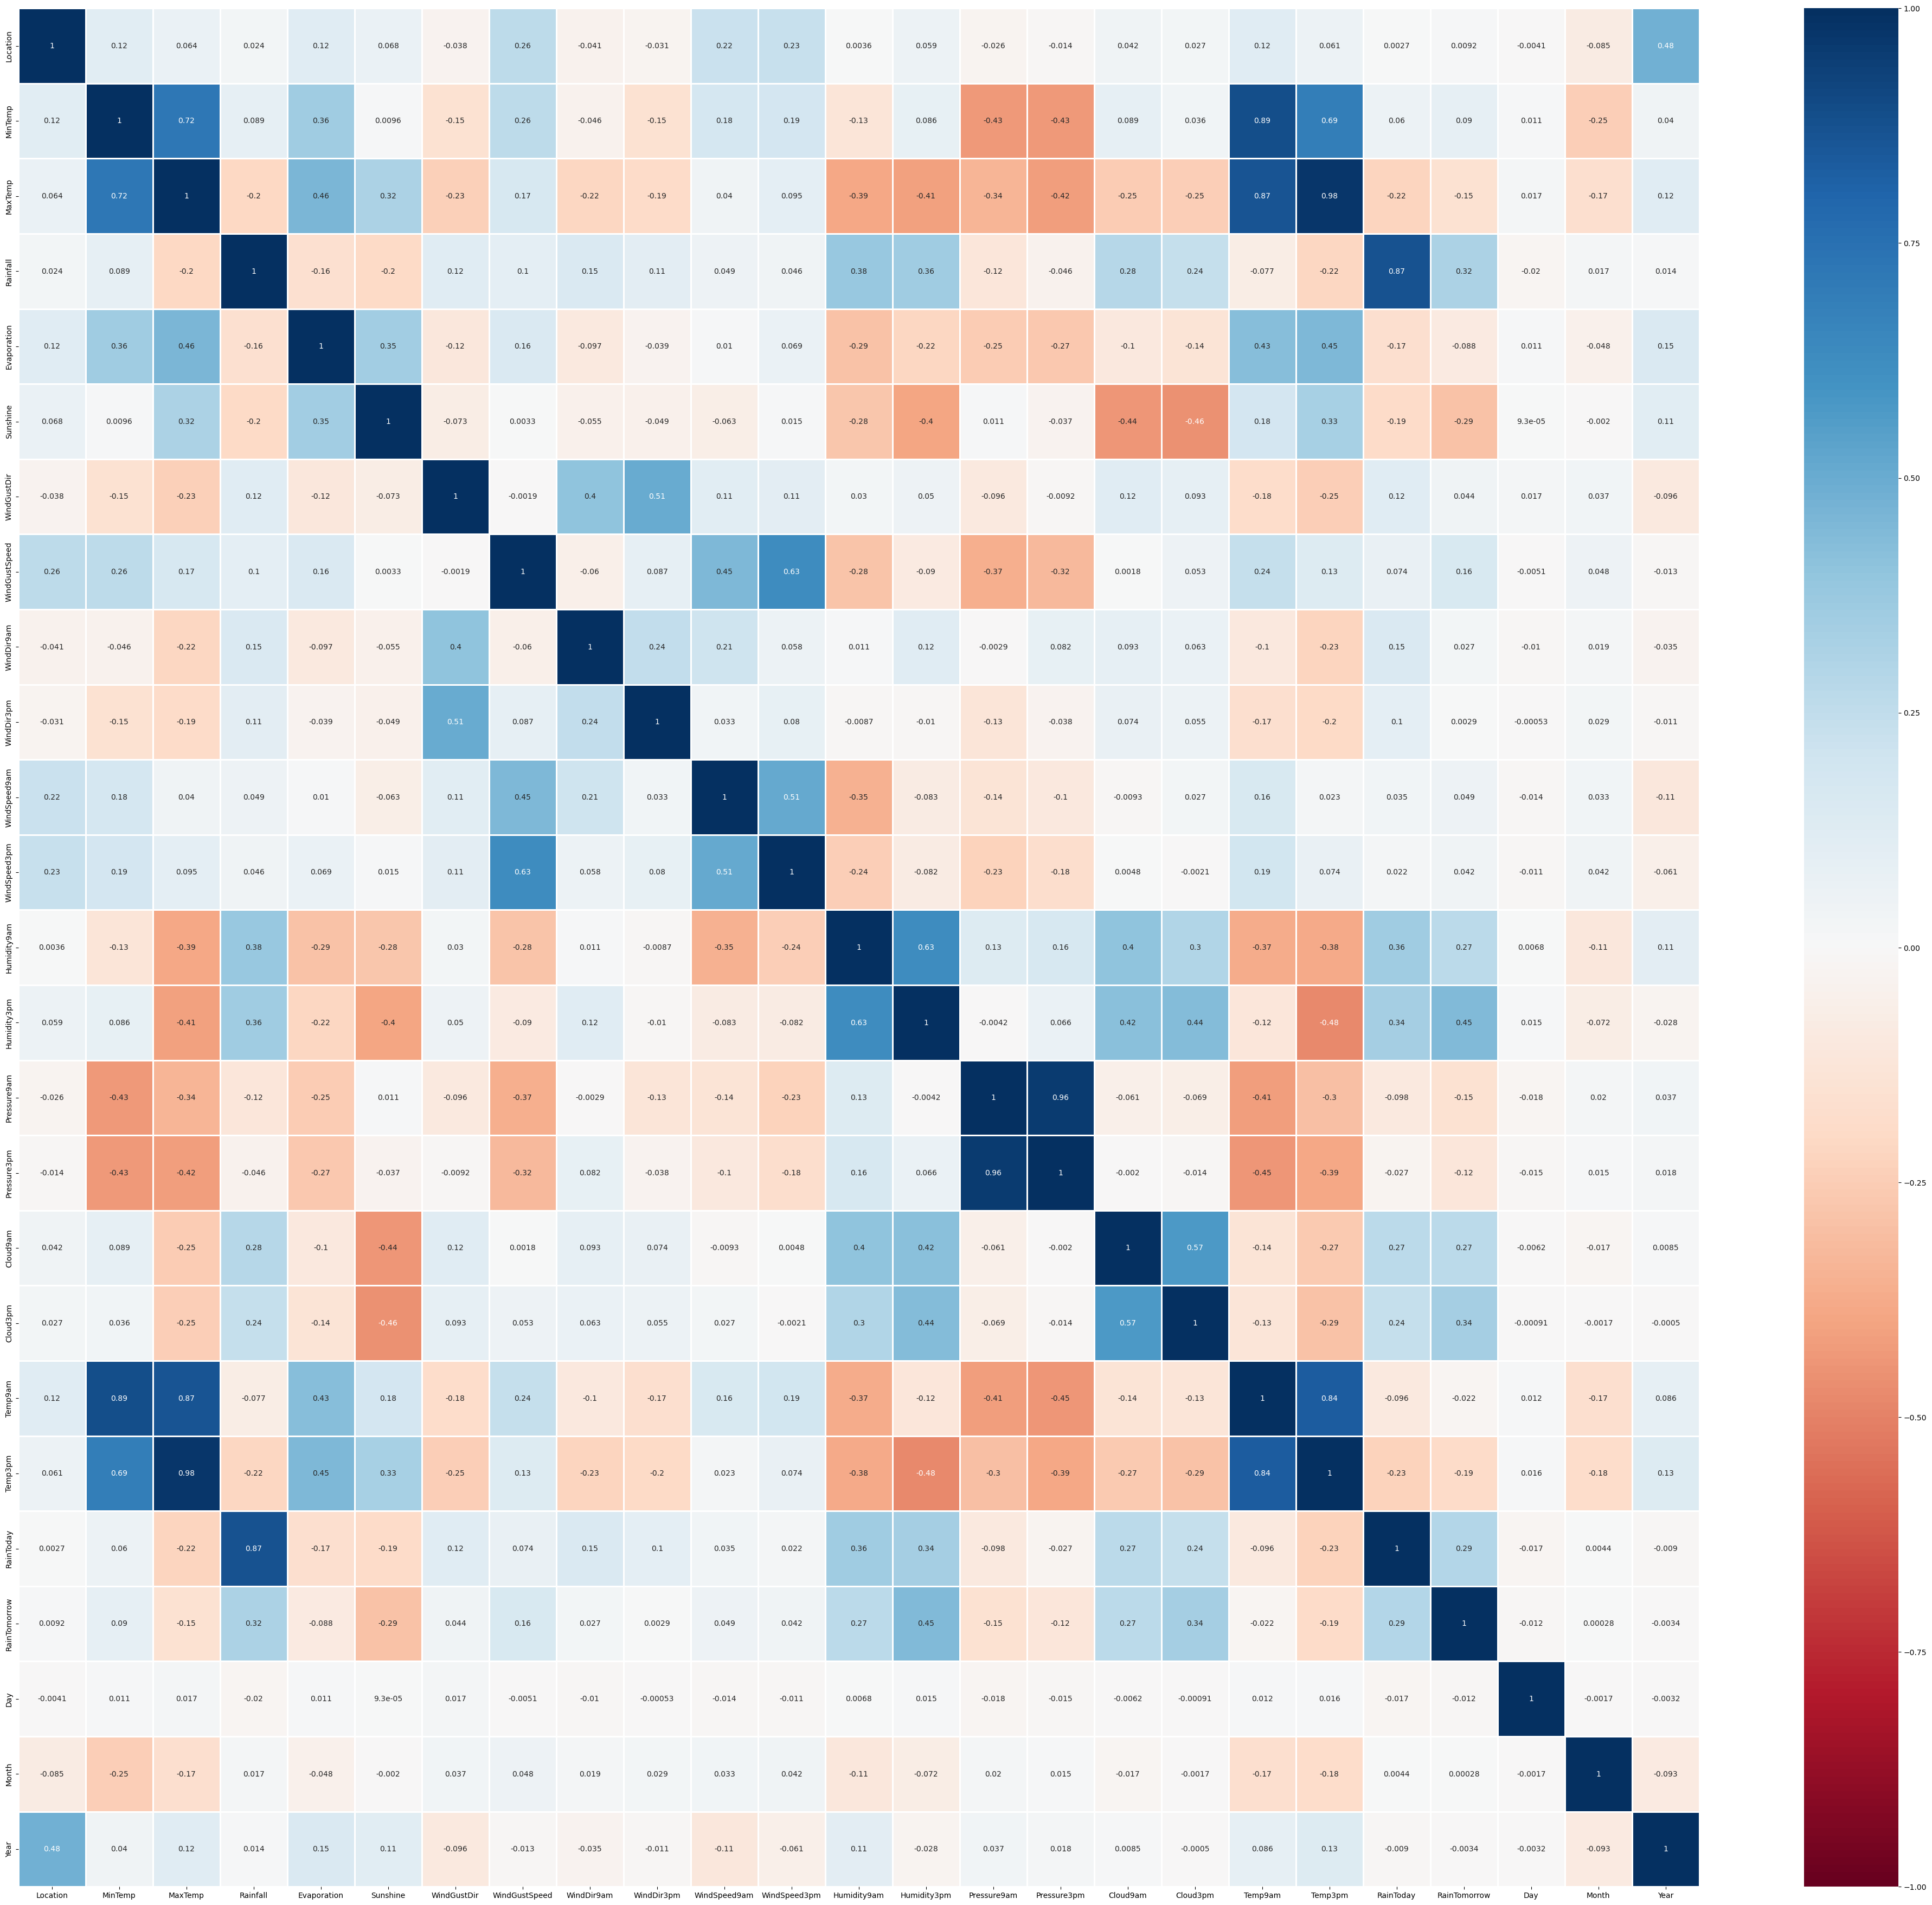

In [53]:
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=+1,linewidths=2)
plt.show()

<AxesSubplot:>

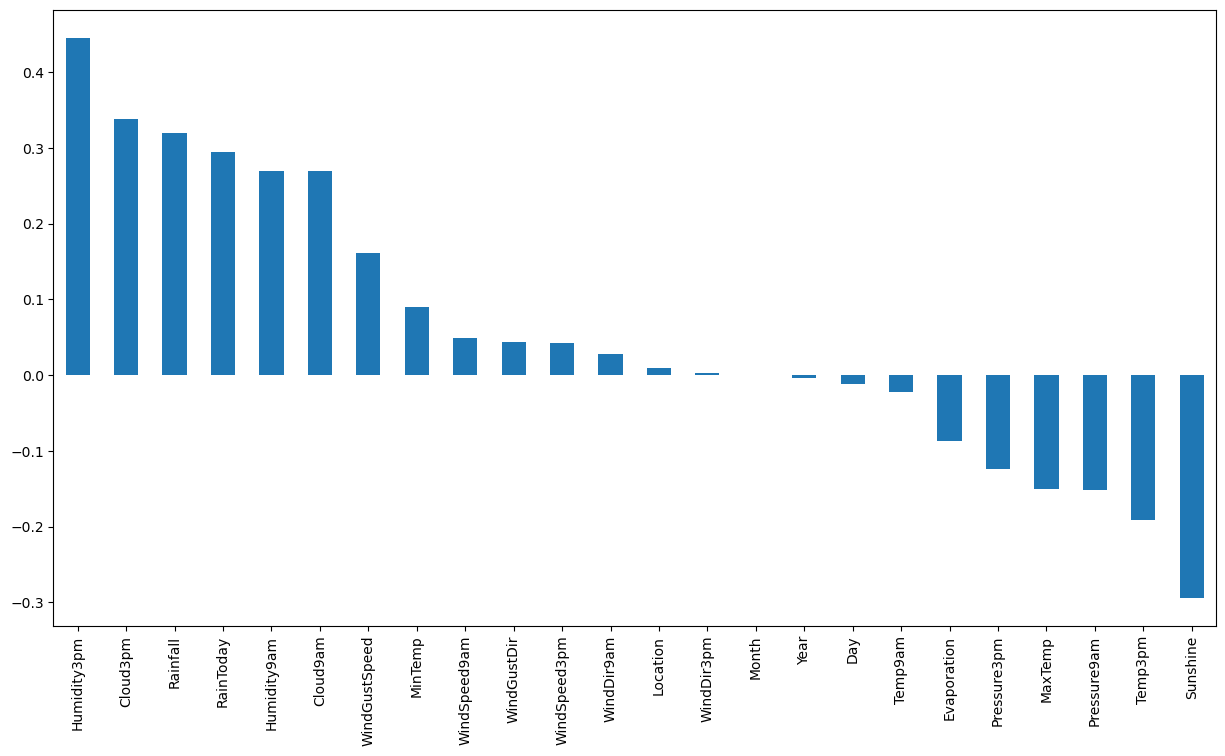

In [54]:
plt.figure(figsize=(15,8))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')

In [55]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


# Prediction for RainTommorow

# Standardization

In [56]:
df_for_rainfall = df.copy()
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [57]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

# Using Variation inflation factor for checking multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(scaled_x):
    #Calculating VIF
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
    return vif
vif = calc_VIF(scaled_x)

In [59]:
pd.set_option('display.max_rows', None)
vif

,Features,VIF
0,Location,1.594122
1,MinTemp,8.804351
2,MaxTemp,26.601916
3,Rainfall,4.412019
4,Evaporation,1.508194
5,Sunshine,1.632919
6,WindGustDir,1.619274
7,WindGustSpeed,2.161000
8,WindDir9am,1.396690
9,WindDir3pm,1.493164


There is high collinearity with:
MaxTemp,
Pressure9am,
Pressure3pm,
Temp9am,
Temp3pm.

# Dropping high collinearity features

In [60]:
x.drop(columns=['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

Checking VIF Again

In [61]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,5.026624,Location
1,10.300899,MinTemp
2,5.853247,Rainfall
3,26.021880,Evaporation
4,27.678415,Sunshine
5,5.287411,WindGustDir
6,239.230554,WindGustSpeed
7,4.662714,WindDir9am
8,5.838361,WindDir3pm
9,12.335165,WindSpeed9am


# Oversampling

In [62]:
y.value_counts()

0    6174
1    1823
Name: RainTomorrow, dtype: int64

We can clearly see the data is imbalanced

# Handling Imbalanced data using SMOTE technique

In [63]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

# Finding the best Random State

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7668016194331984 on random_state: 34


# Creating Train Test Split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = maxRS)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,classification_report,plot_roc_curve,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [67]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        accurcy = classification_report(y_test,model_predict)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x,y,cv=4).mean()
        print('Accuracy : ',accurcy)
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('Roc Auc Curve',roc_auc_score(y_test, model_predict))
        print('_______________________________________________')
compare_models()

Accuracy :                precision    recall  f1-score   support

           0       0.78      0.76      0.77      1878
           1       0.76      0.77      0.77      1827

    accuracy                           0.77      3705
   macro avg       0.77      0.77      0.77      3705
weighted avg       0.77      0.77      0.77      3705

R2 score of the model :  LogisticRegression() = 6.7 %
mean squared error for model :  LogisticRegression() = 0.23319838056680162
cross val score for model :  LogisticRegression() = 0.7087787495950761
Roc Auc Curve 0.7669060646916768
_______________________________________________
Accuracy :                precision    recall  f1-score   support

           0       0.75      0.69      0.72      1878
           1       0.71      0.77      0.73      1827

    accuracy                           0.73      3705
   macro avg       0.73      0.73      0.73      3705
weighted avg       0.73      0.73      0.73      3705

R2 score of the model :  SVC() = -9.0 %
m

We have got good Accuracy and cv score with ExtraTrees Classifier Hyper parameter tuning with ExtraTreesClassifier

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
import warnings
warnings.filterwarnings('ignore')
extratrees_params = {'criterion': ['gini','entropy'],
                   'random_state':[10,50,1000],
                   'max_depth':[0,10,20,30],
                   'n_jobs':[-2,-1,1],
                   'n_estimators':[50,100,200,300]
    }
grid_classifier = GridSearchCV(ExtraTreesClassifier(),extratrees_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The best parameters are {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200, 'n_jobs': -2, 'random_state': 1000}
The best Score is 0.9267624858085384


# Plotting ROC AUC curve

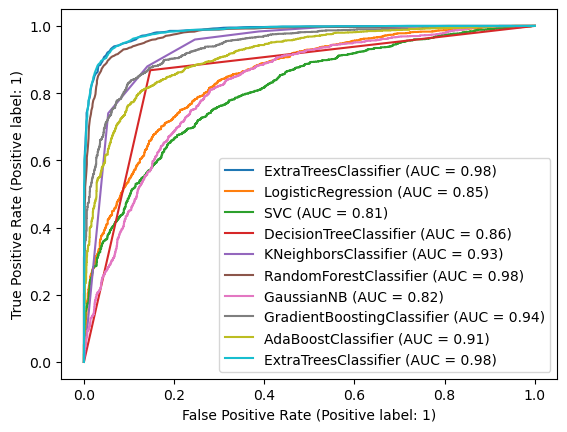

In [70]:
disp = plot_roc_curve(ExtraTreesClassifier().fit(x_train,y_train),x_test,y_test)
for i in models:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# Training the model with best parameters

In [71]:
best_model = ExtraTreesClassifier(criterion='entropy',max_depth=30,n_estimators=300,n_jobs=-2,random_state=1000)
best_model.fit(x_train,y_train)
extratress_pred_best = best_model.predict(x_test)
exratrees_acc = accuracy_score(y_test,extratress_pred_best)
print(exratrees_acc*100)

93.41430499325236


# Confusion matrix

In [72]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,extratress_pred_best)

In [73]:
conf

array([[1722,  156],
       [  88, 1739]], dtype=int64)

# Saving the model

In [74]:
import joblib
joblib.dump(best_model,"rain_pred.pkl")

['rain_pred.pkl']

# Loading the model

In [75]:
mod = joblib.load("rain_pred.pkl")
actual_data = np.array(y_test)
predicted_data = np.array(mod.predict(x_test))
df_comparision = pd.DataFrame({'actual data':actual_data,'predicted value':predicted_data})
df_comparision

,actual data,predicted value
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,0
6,0,1
7,1,1
8,0,0
9,1,1
